## DATASET DESCRIPTION

- Dataset COVID-19 di Indonesia dibuat untuk mengetahui berbagai faktor yang
  dapat dijadikan pertimbangan dalam pengambilan keputusan terkait tingkat keketatan di setiap provinsi di Indonesia.
- Data disusun berdasarkan time series, baik di tingkat negara (Indonesia),
  maupun di tingkat provinsi. Jika diperlukan di provinsi tertentu, mungkin juga disediakan di tingkat kota/kabupaten.
- Data demografi juga tersedia, serta perhitungan antara data demografi dan
  data pandemi COVID-19.

## IMPORT LIBRARY

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## STATISTIK HARIAN

In [6]:
content = """Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths"""

columns_list = content.split("\n")
columns_list

['Date',
 'Location_ISO_Code',
 'Location',
 'New_Cases',
 'New_Deaths',
 'New_Recovered',
 'New_Active_Cases',
 'Total_Cases',
 'Total_Deaths',
 'Total_Recovered',
 'Total_Active_Cases',
 'Location_Level',
 'City_or_Regency',
 'Province',
 'Country',
 'Continent',
 'Island',
 'Time_Zone',
 'Special_Status',
 'Total_Regencies',
 'Total_Cities',
 'Total_Districts',
 'Total_Urban_Villages',
 'Total_Rural_Villages',
 'Area_(km2)',
 'Population',
 'Population_Density',
 'Longitude',
 'Latitude',
 'New_Cases_per_Million',
 'Total_Cases_per_Million',
 'New_Deaths_per_Million',
 'Total_Deaths_per_Million',
 'Case_Fatality_Rate',
 'Case_Recovered_Rate',
 'Growth_Factor_of_New_Cases',
 'Growth_Factor_of_New_Deaths']

In [20]:
df = pd.read_excel('https://github.com/kevingst8/COVID-19-Indonesia/blob/main/COVID-19%20Indonesia.xlsx?raw=true',
       names  = columns_list,header=0,index_col=False)

df.head(6)

<ipython-input-20-0df0bf520212>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_excel('https://github.com/kevingst8/COVID-19-Indonesia/blob/main/COVID-19%20Indonesia.xlsx?raw=true',


Date  Location_ISO_Code  Location  New_Cases  New_Deaths  \
0 2020-03-02                2.0       0.0        2.0         2.0   
1 2020-03-03                0.0       0.0        0.0         2.0   
2 2020-03-04                0.0       0.0        0.0         2.0   
3 2020-03-05                0.0       0.0        0.0         2.0   
4 2020-03-06                2.0       0.0        2.0         4.0   
5 2020-03-07                0.0       0.0        0.0         4.0   

   New_Recovered  New_Active_Cases  Total_Cases  Total_Deaths  \
0            2.0               1.0          0.0           0.0   
1            2.0               1.0          0.0           0.0   
2            2.0               1.0          0.0           0.0   
3            2.0               1.0          0.0           0.0   
4            4.0               1.0          0.0           0.0   
5            4.0               1.0          0.0           0.0   

   Total_Recovered  ...  Longitude  Latitude  New_Cases_per_Million  \
0              0.0  ...        NaN       NaN                    NaN   
1              0.0  ...        NaN       NaN                    NaN   
2              0.0  ...        NaN       NaN                    NaN   
3              0.0  ...        NaN       NaN                    NaN   
4              0.0  ...        NaN       NaN                    NaN   
5              0.0  ...        NaN       NaN                    NaN   

   Total_Cases_per_Million  New_Deaths_per_Million  Total_Deaths_per_Million  \
0                      NaN                   169.5                     169.5   
1                      NaN                   170.5                     170.5   
2                      NaN                   186.0                     186.0   
3                      NaN                   194.0                     194.0   
4                      NaN                   112.5                     112.5   
5                      NaN                   113.5                     113.5   

   Case_Fatality_Rate  Case_Recovered_Rate  Growth_Factor_of_New_Cases  \
0                 0.0             0.005900                         NaN   
1                 NaN             0.005865                    0.000000   
2                 NaN             0.005376                    0.000000   
3                 NaN             0.005155                    0.000000   
4                31.0             0.008889                    0.037736   
5                 NaN             0.008811                    0.000000   

   Growth_Factor_of_New_Deaths  
0                          NaN  
1                          0.0  
2                          0.0  
3                          0.0  
4                          1.0  
5                          0.0  

[6 rows x 37 columns]

In [30]:
variables = []
dtypes    = []
count     = []
unique    = []
missing   = []

for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable'  : variables,
    'dtype'     : dtypes,
    'count'     : count,
    'unique'    : unique,
    'missing'   : missing,

})

output

variable           dtype  count  unique  missing
0                          Date  datetime64[ns]    568     540       29
1             Location_ISO_Code         float64    568     521       29
2                      Location         float64    568       5      558
3                     New_Cases         float64    568       6      558
4                    New_Deaths         float64    568     536       29
5                 New_Recovered         float64    568     534       29
6              New_Active_Cases         float64    568     532       29
7                   Total_Cases         float64    568     506       29
8                  Total_Deaths         float64    568     529       29
9               Total_Recovered         float64    568     532       29
10           Total_Active_Cases         float64    568     530       37
11               Location_Level         float64    568     301       29
12              City_or_Regency         float64    568     529       29
13                     Province         float64    568     532       29
14                      Country         float64    568     529       38
15                    Continent         float64    568      92      477
16                       Island         float64    568      91      477
17                    Time_Zone         float64    568     464      105
18               Special_Status         float64    568     540       29
19              Total_Regencies         float64    568     540       29
20                 Total_Cities         float64    568     537       29
21              Total_Districts         float64    568     183      382
22         Total_Urban_Villages         float64    568      18      397
23         Total_Rural_Villages         float64    568     494       73
24                   Area_(km2)         float64    568     166      401
25                   Population         float64    568     165      401
26           Population_Density         float64    568     537       31
27                    Longitude         float64    568     170      399
28                     Latitude         float64    568     170      399
29        New_Cases_per_Million         float64    568       4      565
30      Total_Cases_per_Million         float64    568     530       39
31       New_Deaths_per_Million         float64    568     540       29
32     Total_Deaths_per_Million         float64    568     540       29
33           Case_Fatality_Rate         float64    568     533       34
34          Case_Recovered_Rate         float64    568     540       29
35   Growth_Factor_of_New_Cases         float64    568     533       32
36  Growth_Factor_of_New_Deaths         float64    568     535       31

In [31]:
daily_stats=daily_stats[['Date','Dosis pertama (harian)','Dosis kedua (harian)']]
daily_stats

Date  Dosis pertama (harian)  Dosis kedua (harian)
0   2020-03-02                     NaN                   NaN
1   2020-03-03                     NaN                   NaN
2   2020-03-04                     NaN                   NaN
3   2020-03-05                     NaN                   NaN
4   2020-03-06                     NaN                   NaN
..         ...                     ...                   ...
563        NaT                     NaN                   NaN
564        NaT                     NaN                   NaN
565        NaT                     NaN                   NaN
566        NaT                     NaN                   NaN
567        NaT                     NaN                   NaN

[568 rows x 3 columns]

In [25]:
daily_stats.describe()

Dosis pertama (harian)  Dosis kedua (harian)
count            2.230000e+02            209.000000
mean             2.570621e+05         152527.004785
std              2.482000e+05         171087.358865
min              6.600000e+01             66.000000
25%              4.870300e+04          32201.000000
50%              1.768140e+05         112710.000000
75%              4.063020e+05         182222.000000
max              1.100363e+06         911678.000000

## DATA CLEANING

In [33]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
day_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
month_mapping={
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12:'December'
}

df['Dayofweek']= df['Date'].dt.weekday.map(day_mapping)
df['Monthofyear']= df['Date'].dt.month.map(month_mapping)
df['Year'].unique()

array([2020., 2021.,   nan])

In [34]:
daily_stats.Dosis1.fillna(0, inplace = True)
daily_stats.Dosis2.fillna(0, inplace = True)
daily_stats

Date  Dosis1  Dosis2
0   2020-03-02     0.0     0.0
1   2020-03-03     0.0     0.0
2   2020-03-04     0.0     0.0
3   2020-03-05     0.0     0.0
4   2020-03-06     0.0     0.0
..         ...     ...     ...
563        NaT     0.0     0.0
564        NaT     0.0     0.0
565        NaT     0.0     0.0
566        NaT     0.0     0.0
567        NaT     0.0     0.0

[568 rows x 3 columns]

In [35]:
daily_stats.dropna(0, inplace = True)
daily_stats.set_index('Date', inplace = True)
daily_stats

<ipython-input-35-a95d4f2eec6e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  daily_stats.dropna(0, inplace = True)


Dosis1    Dosis2
Date                          
2020-03-02       0.0       0.0
2020-03-03       0.0       0.0
2020-03-04       0.0       0.0
2020-03-05       0.0       0.0
2020-03-06       0.0       0.0
...              ...       ...
2021-08-19  644813.0  702847.0
2021-08-20  357948.0  355245.0
2021-08-21  598148.0  619482.0
2021-08-22   56022.0   34715.0
2021-08-23  675502.0  638469.0

[539 rows x 2 columns]

## KASUS HARIAN PER-PROVINSI

In [36]:
daily_cases=pd.read_excel(data,sheet_name='Kasus Aktif')
daily_cases

Date   Aceh    Bali  Banten  Babel  Bengkulu     DIY  Jakarta  \
0   2020-03-15    NaN     NaN     NaN    NaN       NaN     NaN     19.0   
1   2020-03-16    NaN     NaN     1.0    NaN       NaN     NaN     14.0   
2   2020-03-17    NaN     NaN     NaN    NaN       NaN     NaN      NaN   
3   2020-03-18    NaN     NaN     4.0    NaN       NaN     1.0     30.0   
4   2020-03-19    NaN     NaN    10.0    NaN       NaN     2.0     52.0   
..         ...    ...     ...     ...    ...       ...     ...      ...   
522 2021-08-19  355.0  1032.0   395.0  452.0     129.0  1175.0    731.0   
523 2021-08-20  459.0  1039.0   449.0  440.0      98.0   820.0    968.0   
524 2021-08-21  382.0   849.0   374.0  393.0      71.0   930.0    891.0   
525 2021-08-22  334.0   583.0   214.0  301.0     113.0   783.0    702.0   
526 2021-08-23  229.0   434.0   124.0  191.0      55.0   507.0    485.0   

     Jambi   Jabar  ...  Sulteng  Lampung   Riau  Malut  Maluku  Papbar  \
0      NaN     NaN  ...      NaN      NaN    NaN    NaN     NaN     NaN   
1      NaN     1.0  ...      NaN      NaN    NaN    NaN     NaN     NaN   
2      NaN     NaN  ...      NaN      NaN    NaN    NaN     NaN     NaN   
3      NaN    12.0  ...      NaN      1.0    1.0    NaN     NaN     NaN   
4      NaN     2.0  ...      NaN      NaN    1.0    NaN     NaN     NaN   
..     ...     ...  ...      ...      ...    ...    ...     ...     ...   
522  357.0  3266.0  ...    833.0    375.0  835.0   42.0    13.0    84.0   
523  325.0  2742.0  ...    595.0    371.0  764.0   18.0    17.0    53.0   
524  321.0  1747.0  ...    546.0    319.0  610.0   35.0    11.0    22.0   
525  198.0  1192.0  ...    318.0    243.0  568.0   16.0     7.0     9.0   
526   62.0  1483.0  ...    331.0    250.0  357.0   73.0    10.0    23.0   

     Papua  Sulbar    NTT  Gorontalo  
0      NaN     NaN    NaN        NaN  
1      NaN     NaN    NaN        NaN  
2      NaN     NaN    NaN        NaN  
3      NaN     NaN    NaN        NaN  
4      NaN     NaN    NaN        NaN  
..     ...     ...    ...        ...  
522  200.0    99.0  714.0       99.0  
523  136.0    89.0  491.0      118.0  
524  187.0   109.0  377.0       47.0  
525   74.0    83.0  295.0       87.0  
526  101.0    14.0  223.0       39.0  

[527 rows x 35 columns]

In [37]:
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       527 non-null    datetime64[ns]
 1   Aceh       424 non-null    float64       
 2   Bali       510 non-null    float64       
 3   Banten     513 non-null    float64       
 4   Babel      419 non-null    float64       
 5   Bengkulu   434 non-null    float64       
 6   DIY        500 non-null    float64       
 7   Jakarta    526 non-null    float64       
 8   Jambi      406 non-null    float64       
 9   Jabar      521 non-null    float64       
 10  Jateng     520 non-null    float64       
 11  Jatim      518 non-null    float64       
 12  Kalbar     400 non-null    float64       
 13  Kaltim     505 non-null    float64       
 14  Kalteng    474 non-null    float64       
 15  Kalsel     500 non-null    float64       
 16  Kaltara    423 non-null    float64       
 1

In [38]:
daily_cases.fillna(0, inplace = True)
daily_cases.set_index('Date', inplace = True)
daily_cases.head()

Aceh  Bali  Banten  Babel  Bengkulu  DIY  Jakarta  Jambi  Jabar  \
Date                                                                          
2020-03-15   0.0   0.0     0.0    0.0       0.0  0.0     19.0    0.0    0.0   
2020-03-16   0.0   0.0     1.0    0.0       0.0  0.0     14.0    0.0    1.0   
2020-03-17   0.0   0.0     0.0    0.0       0.0  0.0      0.0    0.0    0.0   
2020-03-18   0.0   0.0     4.0    0.0       0.0  1.0     30.0    0.0   12.0   
2020-03-19   0.0   0.0    10.0    0.0       0.0  2.0     52.0    0.0    2.0   

            Jateng  ...  Sulteng  Lampung  Riau  Malut  Maluku  Papbar  Papua  \
Date                ...                                                         
2020-03-15     2.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-16     1.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-17     0.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-18     2.0  ...      0.0      1.0   1.0    0.0     0.0     0.0    0.0   
2020-03-19     4.0  ...      0.0      0.0   1.0    0.0     0.0     0.0    0.0   

            Sulbar  NTT  Gorontalo  
Date                                
2020-03-15     0.0  0.0        0.0  
2020-03-16     0.0  0.0        0.0  
2020-03-17     0.0  0.0        0.0  
2020-03-18     0.0  0.0        0.0  
2020-03-19     0.0  0.0        0.0  

[5 rows x 34 columns]

## SEMBUH HARIAN PER-PROVINSI

In [39]:
daily_recovered=pd.read_excel(data,sheet_name = 'Sembuh Harian')
daily_recovered

Date   Aceh    Bali  Banten  Babel  Bengkulu     DIY  Jakarta  \
0   2020-03-21    NaN     NaN     NaN    NaN       NaN     1.0      3.0   
1   2020-03-22    NaN     NaN     NaN    NaN       NaN     NaN      5.0   
2   2020-03-23    NaN     NaN     NaN    NaN       NaN     NaN      1.0   
3   2020-03-24    NaN     NaN     NaN    NaN       NaN     NaN      NaN   
4   2020-03-25    NaN     NaN     NaN    NaN       NaN     NaN      NaN   
..         ...    ...     ...     ...    ...       ...     ...      ...   
516 2021-08-19  238.0  1025.0   408.0  587.0     100.0  2121.0    934.0   
517 2021-08-20  244.0  1244.0   470.0  581.0     100.0  2347.0    948.0   
518 2021-08-21  255.0  1197.0   152.0  483.0     103.0  2547.0    915.0   
519 2021-08-22  178.0  1055.0   862.0  443.0     189.0  1123.0   1102.0   
520 2021-08-23  287.0  1012.0   960.0  519.0     442.0  1553.0    641.0   

     Jambi   Jabar  ...  Sulteng  Lampung    Riau  Malut  Maluku  Papbar  \
0      NaN     NaN  ...      NaN      NaN     NaN    NaN     NaN     NaN   
1      NaN     4.0  ...      NaN      NaN     NaN    NaN     NaN     NaN   
2      NaN     NaN  ...      NaN      NaN     NaN    NaN     NaN     NaN   
3      NaN     NaN  ...      NaN      NaN     NaN    NaN     NaN     NaN   
4      NaN     NaN  ...      NaN      NaN     NaN    NaN     NaN     NaN   
..     ...     ...  ...      ...      ...     ...    ...     ...     ...   
516  362.0  6680.0  ...    803.0    266.0   702.0  165.0    96.0   213.0   
517  340.0  3071.0  ...    842.0    430.0  1187.0   64.0   133.0   117.0   
518  194.0  1654.0  ...    577.0    441.0  1119.0   66.0    98.0   379.0   
519  480.0  1830.0  ...    755.0    419.0   669.0  136.0   150.0   336.0   
520  375.0  1602.0  ...    629.0    353.0  1033.0  146.0   344.0   131.0   

     Papua  Sulbar     NTT  Gorontalo  
0      NaN     NaN     NaN        NaN  
1      NaN     NaN     NaN        NaN  
2      NaN     NaN     NaN        NaN  
3      NaN     NaN     NaN        NaN  
4      NaN     NaN     NaN        NaN  
..     ...     ...     ...        ...  
516   73.0   209.0   940.0      165.0  
517   61.0   108.0  1210.0      199.0  
518   50.0   121.0   595.0      120.0  
519   59.0   104.0   621.0      177.0  
520   74.0   110.0   835.0       61.0  

[521 rows x 35 columns]

## MENINGGAL HARIAN PER-PROVINSI

In [40]:
daily_death = pd.read_excel(data,sheet_name = 'Meninggal Harian')
daily_death

Date  Aceh  Bali  Banten  Babel  Bengkulu   DIY  Jakarta  Jambi  \
0   2020-03-21   NaN   NaN     1.0    NaN       NaN   NaN      5.0    NaN   
1   2020-03-22   NaN   1.0     1.0    NaN       NaN   NaN      6.0    NaN   
2   2020-03-23   NaN   NaN     NaN    NaN       NaN   NaN      NaN    NaN   
3   2020-03-24   NaN   NaN     1.0    NaN       NaN   1.0      2.0    NaN   
4   2020-03-25   NaN   NaN     NaN    NaN       NaN   1.0      NaN    NaN   
..         ...   ...   ...     ...    ...       ...   ...      ...    ...   
516 2021-08-19  12.0  62.0    17.0   12.0       2.0  57.0     34.0   10.0   
517 2021-08-20  18.0  73.0     4.0   16.0      22.0  47.0     11.0    4.0   
518 2021-08-21  29.0  57.0     6.0   13.0      17.0  29.0     13.0    9.0   
519 2021-08-22  24.0  52.0     2.0   14.0       0.0  39.0     28.0    8.0   
520 2021-08-23  22.0  66.0    10.0   19.0       5.0  39.0     20.0   13.0   

     Jabar  ...  Sulteng  Lampung  Riau  Malut  Maluku  Papbar  Papua  Sulbar  \
0      NaN  ...      NaN      NaN   NaN    NaN     NaN     NaN    NaN     NaN   
1      2.0  ...      NaN      NaN   NaN    NaN     NaN     NaN    NaN     NaN   
2      NaN  ...      NaN      NaN   NaN    NaN     NaN     NaN    NaN     NaN   
3      1.0  ...      NaN      NaN   NaN    NaN     NaN     NaN    NaN     NaN   
4      NaN  ...      NaN      NaN   NaN    NaN     NaN     NaN    NaN     NaN   
..     ...  ...      ...      ...   ...    ...     ...     ...    ...     ...   
516  239.0  ...     23.0     90.0  28.0    7.0     2.0     2.0    1.0     3.0   
517  268.0  ...     17.0     35.0  30.0    0.0     0.0     0.0    0.0     4.0   
518  343.0  ...     29.0     15.0  43.0    4.0     3.0     4.0    0.0     9.0   
519   59.0  ...     21.0     51.0  29.0    3.0     0.0     2.0    0.0     3.0   
520   37.0  ...     15.0     58.0  30.0    5.0     0.0     1.0    0.0     6.0   

      NTT  Gorontalo  
0     NaN        NaN  
1     NaN        NaN  
2     NaN        NaN  
3     NaN        NaN  
4     NaN        NaN  
..    ...        ...  
516  10.0        4.0  
517  10.0       14.0  
518   8.0        9.0  
519   9.0        6.0  
520  14.0        4.0  

[521 rows x 35 columns]

In [41]:
daily_death.fillna(0,inplace=True)
daily_death.set_index('Date',inplace=True)
daily_death.head()

Aceh  Bali  Banten  Babel  Bengkulu  DIY  Jakarta  Jambi  Jabar  \
Date                                                                          
2020-03-21   0.0   0.0     1.0    0.0       0.0  0.0      5.0    0.0    0.0   
2020-03-22   0.0   1.0     1.0    0.0       0.0  0.0      6.0    0.0    2.0   
2020-03-23   0.0   0.0     0.0    0.0       0.0  0.0      0.0    0.0    0.0   
2020-03-24   0.0   0.0     1.0    0.0       0.0  1.0      2.0    0.0    1.0   
2020-03-25   0.0   0.0     0.0    0.0       0.0  1.0      0.0    0.0    0.0   

            Jateng  ...  Sulteng  Lampung  Riau  Malut  Maluku  Papbar  Papua  \
Date                ...                                                         
2020-03-21     0.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-22     0.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-23     0.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-24     0.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   
2020-03-25     1.0  ...      0.0      0.0   0.0    0.0     0.0     0.0    0.0   

            Sulbar  NTT  Gorontalo  
Date                                
2020-03-21     0.0  0.0        0.0  
2020-03-22     0.0  0.0        0.0  
2020-03-23     0.0  0.0        0.0  
2020-03-24     0.0  0.0        0.0  
2020-03-25     0.0  0.0        0.0  

[5 rows x 34 columns]

**## EXPLORASI DATA**


Menjawab pertanyaan berikut:

1. Bagaimana perkembangan covid-19 di Indonesia?
2. Apakah kita sudah mengalami puncak kedua?
3. Provinsi mana yang paling banyak total kasusnya?
4. Apakah PPKM sudah cukup efektif mengurangi kasus Covid-19?
5. Bagaimana perkembangan vaksinasi di Indonesia baik dosis pertama atau kedua?

In [52]:
daily_cases['Nasional']=daily_cases.sum(axis=1)
daily_recovered['Nasional']=daily_recovered.sum(axis=1)
daily_death['Nasional']=daily_death.sum(axis=1)

<ipython-input-52-edc82c82625d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_recovered['Nasional']=daily_recovered.sum(axis=1)


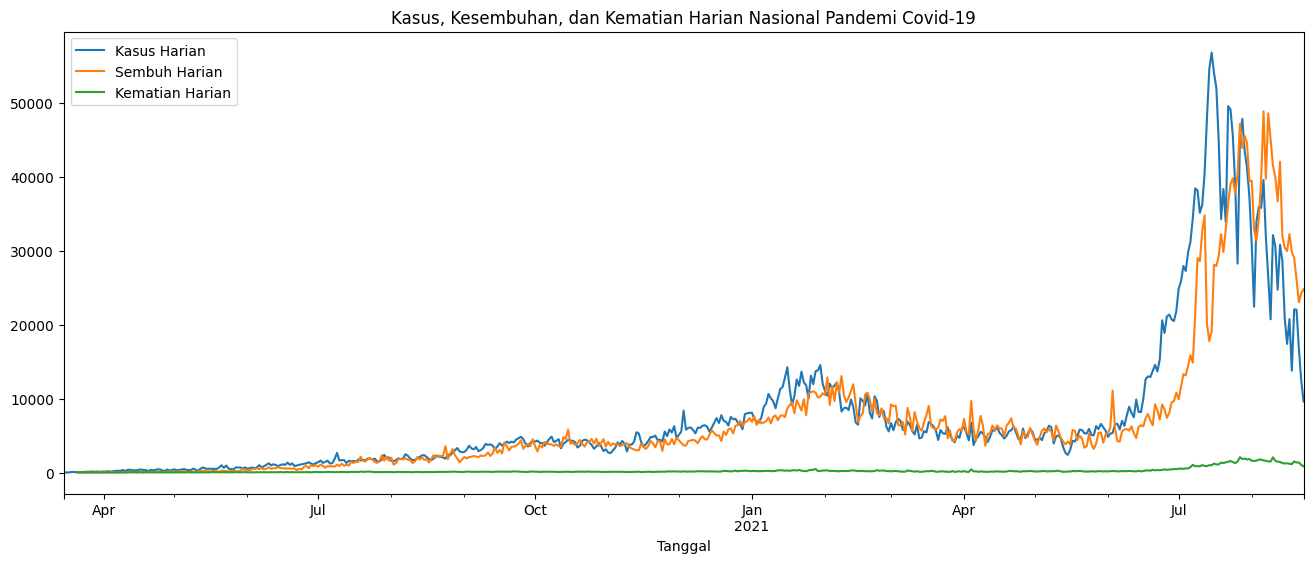

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
daily_recovered['Nasional'].plot(kind='line',ax=ax,label='Sembuh Harian')
daily_death['Nasional'].plot(kind='line',ax=ax,label='Kematian Harian')
ax.set_xlabel('Tanggal')
ax.set_title('Kasus, Kesembuhan, dan Kematian Harian Nasional Pandemi Covid-19')
ax.legend()

 Insight dari grafik :
 - Tren kasus dan kesembuhan harian memiliki trend yg serupa.
 - Jumlah orang yg meninggal karena covid-19 jauh lebih sedikit dibandingkan
   yang sembuh
 - Berdasarkan tren kasus positif harian, Indonesia sudah mengalami 2x puncak,
   dimana puncak pertama sekitar January-Febuari 2021 dan puncak kedua sekitar Juli 2021.
 - Apakah seluruh daerah mengalami dua kali puncak atau hanya daerah tertentu
   saja dengan jumlah kasus yang paling banyak diantara yg lain?


In [61]:
island_prov = {'Aceh':'Sumatera','Bali':'Bali-Nusa Tenggara','Banten':'Jawa','Babel':'Sumatera', 'Bengkulu':'Sumatera', 'DIY':'Jawa',
               'Jakarta':'Jawa', 'Jambi':'Sumatera','Jabar':'Jawa','Jateng':'Jawa','Jatim':'Jawa','Kalbar':'Kalimantan','Kaltim':'Kalimantan',
               'Kalteng':'Kalimantan','Kalsel':'Kalimantan','Kaltara':'Kalimantan','Kep Riau':'Sumatera','NTB':'Bali-Nusa Tenggara','Sumsel':'Sumatera',
               'sumbar':'Sumatera','Sulut':'Sulawesi','Sumut':'Sumatera','Sultra':'Sulawesi','Sulsel':'Sulawesi','Sulteng':'Sulawesi','Lampung':'Sumatera',
               'Riau':'Sumatera','Malut':'Maluku-Papua', 'Maluku':'Maluku-Papua','Papbar':'Maluku-Papua','Papua':'Maluku-Papua','Sulbar':'Sulawesi',
               'NTT':'Bali-Nusa Tenggara','Gorontalo':'Sulawesi'}

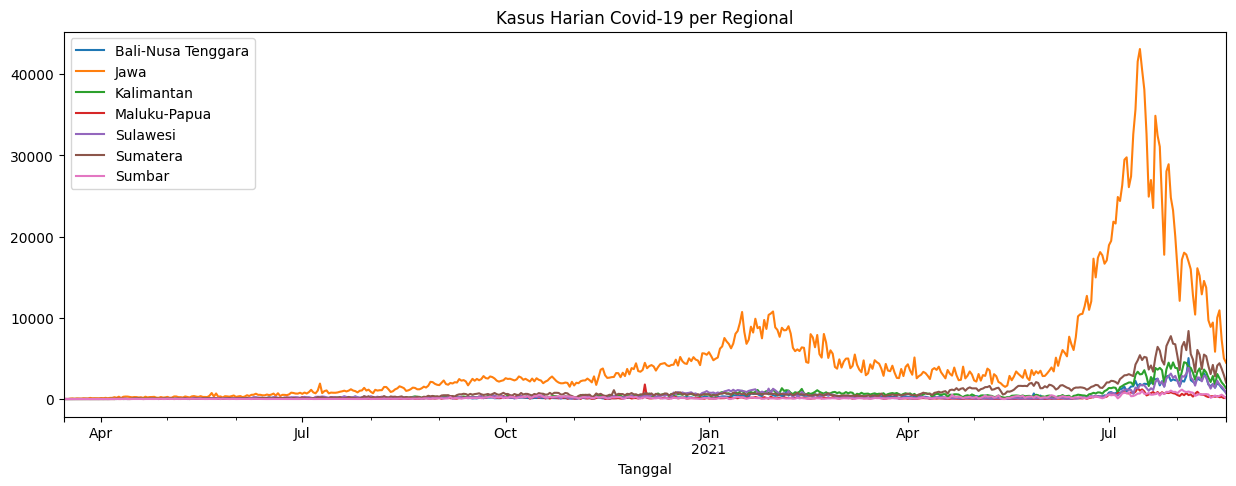

In [68]:
fig,ax=plt.subplots(figsize=(15,5))

daily_cases_region=daily_cases.rename(island_prov,axis=1).drop(columns='Nasional')
daily_cases_region=daily_cases_region.transpose().groupby(daily_cases_region.columns).sum().transpose()

daily_cases_region.plot(kind='line',ax=ax)
ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Covid-19 per Regional')
ax.legend()

Insight grafik

- Kasus tertinggi terjadi di Pulau Jawa. Regional yg paling sedikit kasusnya
  adalah Maluku-Papua
- Puncak dibulan Januari-Febuari 2021 hanya terjadi di Pulau Jawa.
- Semua regional mengalami puncak disekitar bulan Juli 2021
- Selama Pulau Jawa mengalami penurunan jumlah kasus harian setelah mengalami
  puncak kedua, daerah lain seperti Sumatera, Kalimantan, Sulawesi dan
  Bali-Nusa Tenggara mengalami kenaikan jumlah kasus

Puncak kasus Covid di tanggal 2021-07-15 00:00:00


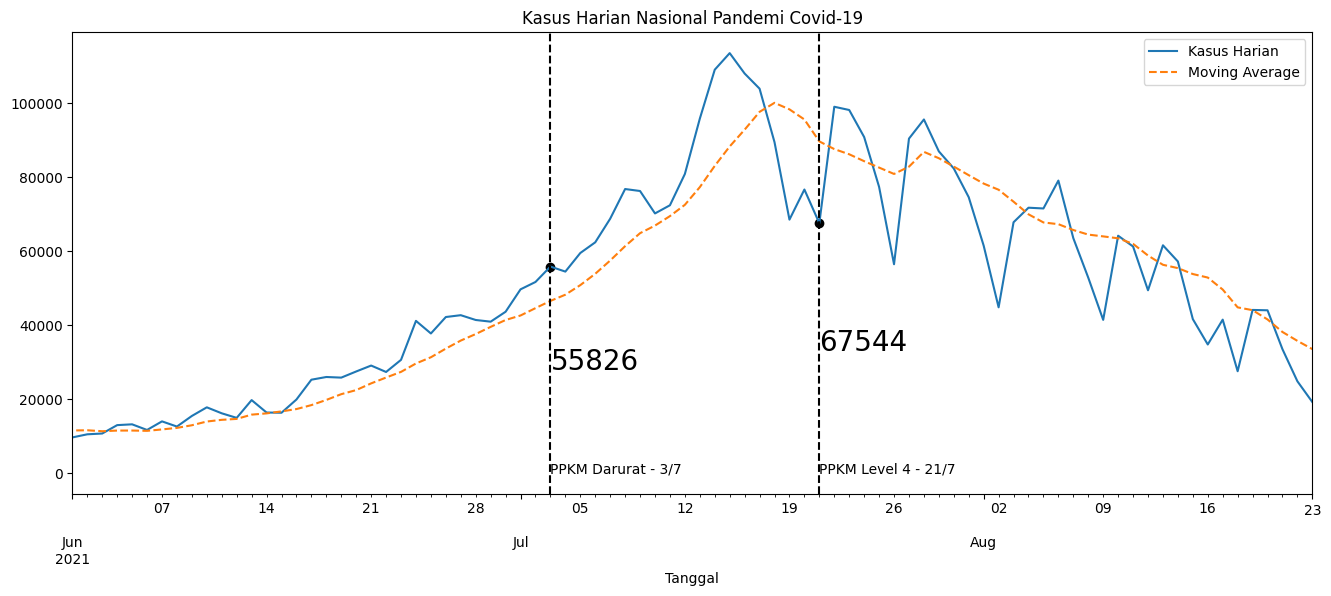

In [71]:
fig,ax=plt.subplots(figsize=(16,6))

MA_cases=daily_cases['Nasional'].rolling(window=7).mean()

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
MA_cases.plot(kind='line',ax=ax,label='Moving Average', ls='--')

ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Nasional Pandemi Covid-19')

ax.axvline(x='2021-07-03',color='black',ls='--')
ax.annotate('PPKM Darurat - 3/7', ('2021-07-03',1))
ax.axvline(x='2021-07-21',color='black',ls='--')
ax.annotate('PPKM Level 4 - 21/7', ('2021-07-21',1))

ax.scatter('2021-07-03',daily_cases['Nasional'].loc['2021-07-03'],color='black')
ax.scatter('2021-07-21',daily_cases['Nasional'].loc['2021-07-21'],color='black')
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-03']), ('2021-07-03',27900), fontsize=20)
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-21']), ('2021-07-21',33000), fontsize=20)

ax.legend()
ax.set_xlim('2021-06-01','2021-08-23')

print('Puncak kasus Covid di tanggal',daily_cases[daily_cases['Nasional']==daily_cases['Nasional'].max()].index[0])

Insight grafik

- Dilansir https://megapolitan.kompas.com/read/2021/07/15/13220151awal-mula-varian-delta-masuk-ke-jakarta-hingga-mendominasi-90-persen, varian Delta masuk ke Indonesia sejak tanggal 3 Mei 2021 dan diperparah dengan libur lebaran 21 Mei - 10 Juni 2021, kasus harian Indonesia terus melonjak hingga tanggal 3 Juli 2021 diberlakukan PPKM Darurat Jawa-Bali ketika kasus harian nasional mencapai 27.913 kasus.
- Pemberlakuan PPKM darurat belum cukup efektif menekan jumlah kasus harian sampai mengalami puncak di tanggal 15 Juli 2021 akibat varian Delta, namun mulai terjadi penurunan meskipun kasus melonjak lagi sejak diberlakukannya PPKM Level 4 di tanggal 21 Juli 2021.
- Sejak diberlakukan PPKM Level 4, tren kasus Covid kian menurun hingga tanggal 23 Agustus 2021 di bawah 20.000 kasus.

Text(0.5, 1.0, 'Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

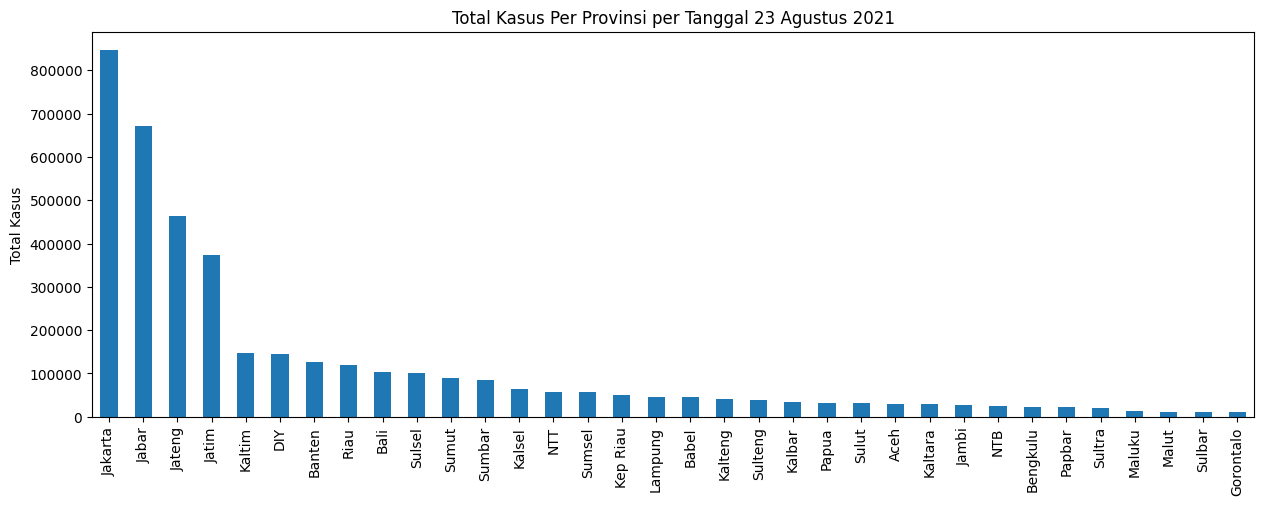

In [81]:
fig,ax=plt.subplots(figsize=(15,5))
daily_cases.drop(columns='Nasional').sum().sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Total Kasus')
ax.set_title('Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

Insight grafik

5 provinsi paling banyak kasusnya adalah Jakarta, Jabar, Jateng, Jatim, dan Kaltim (Di dominasi oleh pulau Jawa)

(18628.0, 18862.0)

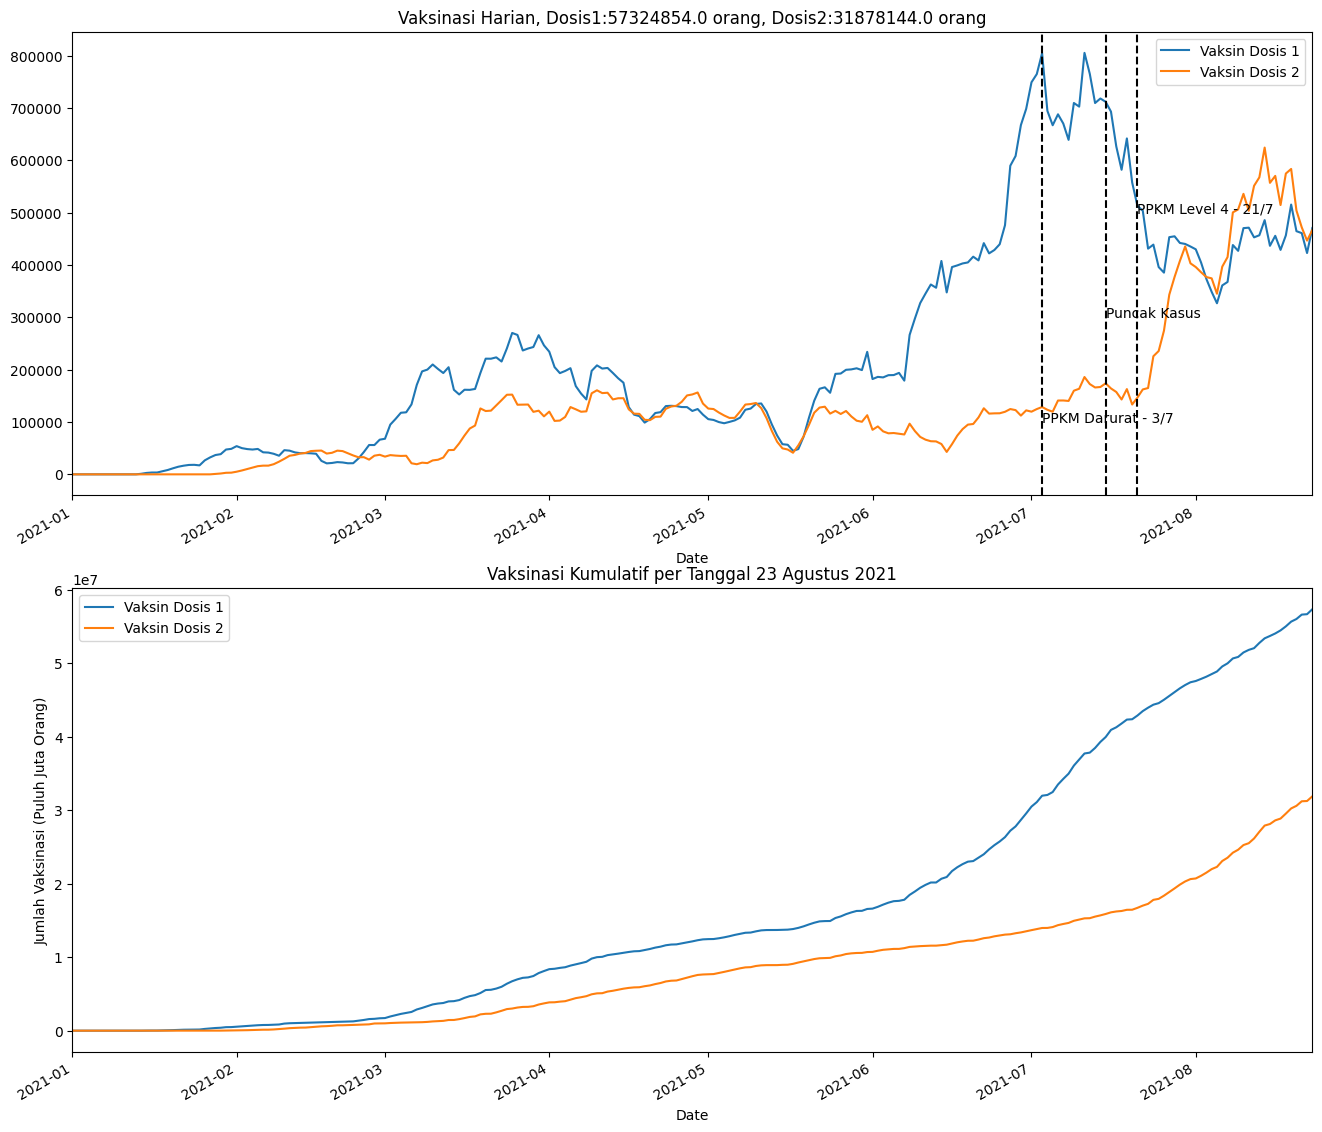

In [87]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(16,15))

daily_stats['Dosis1'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 1')
daily_stats['Dosis2'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 2')

ax[0].axvline(x='2021-07-15', color='black',ls='--')
ax[0].annotate('Puncak Kasus', ('2021-07-15',300000))
ax[0].axvline(x='2021-07-03',color='black',ls='--')
ax[0].annotate('PPKM Darurat - 3/7', ('2021-07-03',100000))
ax[0].axvline(x='2021-07-21',color='black',ls='--')
ax[0].annotate('PPKM Level 4 - 21/7', ('2021-07-21',500000))

ax[0].set_title('Vaksinasi Harian, Dosis1:{} orang, Dosis2:{} orang'.format(daily_stats['Dosis1'].sum(),daily_stats['Dosis2'].sum()))
ax[0].legend()
ax[0].set_xlim('2021-01-01','2021-08-23')

daily_stats['Dosis1'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 1')
daily_stats['Dosis2'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 2')
ax[1].set_xlim('2021-01-01','2021-08-23')
ax[1].set_ylabel('Jumlah Vaksinasi (Puluh Juta Orang)')
ax[1].set_title('Vaksinasi Kumulatif per Tanggal 23 Agustus 2021')
ax[1].legend()
ax[1].set_xlim('2021-01-01','2021-08-23')

Insight grafik

- Per tanggal 23 Agustus 2021, jumlah orang yang sudah divaksin dosis pertama sebanyak hampir 60 Juta orang sedangkan dosis 2 mencapai sekitar 30 Juta orang, perbedaannya hampir 50%.
- Jumlah orang yang telah mendapatkan vaksin dosis pertama mengalami lonjakan sejak bulan Juni 2021 namun cenderung menurun sejak diberlakukannya PPKM -Darurat hingga awal agustus mengalami peningkatan kembali.
- Jumlah orang yang telah mendapatkan vaksin dosis kedua terus meningkat.